# <a href="https://girafe.ai/" target="_blank" rel="noopener noreferrer"><img src="https://raw.githubusercontent.com/girafe-ai/ml-course/7096a5df4cada5ee651be1e3215c2f7fb8a7e0bf/logo_margin.svg" alt="girafe-ai logo" width="150px" align="left"></a> [ml-basic course](https://github.com/girafe-ai/ml-course) <a class="tocSkip">

# Almost Shakespeare

Let's try to generate some Shakespeare poetry using RNNs. The sonnets file is available in the notebook directory.

Text generation can be designed in several steps:
    
1. Data loading
2. Dictionary generation
3. Data preprocessing
4. Model (neural network) training
5. Text generation (model evaluation)

### Data loading

Shakespeare sonnets are awailable at this [link](http://www.gutenberg.org/ebooks/1041?msg=welcome_stranger). In addition, they are stored in the same directory as this notebook (`sonnetes.txt`).

Simple preprocessing is already done for you in the next cell: all technical info is dropped.

**Alternatively**

You could use file `onegin.txt` with Russian texts or your natve language poetry to be able to assess results quality.

**Note: In case of Onegin text you need to adjust reading procedure yourself!!!** (this file has a bit different format than `sonnets.txt`)

In [1]:
!wget -nc https://raw.githubusercontent.com/v-goncharenko/madmo-adv/55d929befa12370fc18109f5333f7cf000ea27ce/homeworks/sonnets.txt
!wget -nc https://raw.githubusercontent.com/v-goncharenko/madmo-adv/55d929befa12370fc18109f5333f7cf000ea27ce/homeworks/onegin.txt

--2025-01-12 15:52:24--  https://raw.githubusercontent.com/v-goncharenko/madmo-adv/55d929befa12370fc18109f5333f7cf000ea27ce/homeworks/sonnets.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.109.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 119748 (117K) [text/plain]
Saving to: ‘sonnets.txt’

sonnets.txt         100%[===================>] 116.94K  --.-KB/s    in 0.02s   

2025-01-12 15:52:24 (5.85 MB/s) - ‘sonnets.txt’ saved [119748/119748]

--2025-01-12 15:52:24--  https://raw.githubusercontent.com/v-goncharenko/madmo-adv/55d929befa12370fc18109f5333f7cf000ea27ce/homeworks/onegin.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.

In [2]:
with open("sonnets.txt", "r") as iofile:
    text = iofile.readlines()

TEXT_START = 45
TEXT_END = -368
text = text[TEXT_START:TEXT_END]
assert len(text) == 2616

In opposite to the in-class practice, this time we want to predict complex text. Let's reduce the complexity of the task and lowercase all the symbols.

Now variable `text` is a list of strings. Join all the strings into one and lowercase it.

In [3]:
import string

In [103]:
# Join all the strings into one and lowercase it
# Put result into variable text.
import re
from collections import Counter
import numpy as np
import tensorflow as tf


# Объединение строк в один текст
text = ''.join(text)

def preprocess_sonnets(text):
    text = text.lower()
    text = text.replace('\n', ' newline ')
    text = re.sub(r'[^\w\s\n]', '', text)  # Remove punctuation except newlines
    text = re.sub(r'\bM{0,4}(CM|CD|D?C{0,3})(XC|XL|L?X{0,3})(IX|IV|V?I{0,3})\b', '', text, flags=re.IGNORECASE)  # Remove Roman numerals
    lines = text.splitlines()  # Split by lines to keep the structure
    lines = [line.strip() for line in lines if line.strip()]  # Remove empty lines
    return lines

# Process text
lines = preprocess_sonnets(text)

# Your great code here

assert len(text) == 100225, "Are you sure you have concatenated all the strings?"
assert not any([x in set(lines) for x in string.ascii_uppercase]), "Uppercase letters are present"
print("OK!")
print("lines + newline:", lines)

OK!
lines + newline: ['from fairest creatures we desire increase newline   that thereby beautys rose might never die newline   but as the riper should by time decease newline   his tender heir might bear his memory newline   but thou contracted to thine own bright eyes newline   feedst thy lights flame with selfsubstantial fuel newline   making a famine where abundance lies newline   thy self thy foe to thy sweet self too cruel newline   thou that art now the worlds fresh ornament newline   and only herald to the gaudy spring newline   within thine own bud buriest thy content newline   and tender churl makst waste in niggarding newline     pity the world or else this glutton be newline     to eat the worlds due by the grave and thee newline  newline    newline  newline   when forty winters shall besiege thy brow newline   and dig deep trenches in thy beautys field newline   thy youths proud livery so gazed on now newline   will be a tatterd weed of small worth held newline   then being

Put all the characters, that you've seen in the text, into variable `tokens`.

In [5]:

#tokens = sorted(set(' '.join(sonnets)))
#tokens = [token for token in tokens if token]

Create dictionary `token_to_idx = {<char>: <index>}` and dictionary `idx_to_token = {<index>: <char>}`

In [6]:
# dict <index>:<char>
# Your great code here
# Шаг 2: Создание токенов и индексов
def create_tokenizer(lines):
    words = ' '.join(lines).split()  # Join lines and split into words
    unique_words = sorted(set(words))
    token_to_idx = {word: idx for idx, word in enumerate(unique_words)}
    idx_to_token = {idx: word for idx, word in enumerate(unique_words)}
    return token_to_idx, idx_to_token

# Create tokenizers
token_to_idx, idx_to_token = create_tokenizer(lines)
# dict <char>:<index>
# Your great code here
print("Token to Index Dictionary:", token_to_idx)
print("Index to Token Dictionary:", idx_to_token)


Token to Index Dictionary: {'a': 0, 'abhor': 1, 'abide': 2, 'able': 3, 'about': 4, 'above': 5, 'absence': 6, 'absent': 7, 'abundance': 8, 'abundant': 9, 'abusd': 10, 'abuse': 11, 'abuses': 12, 'abysm': 13, 'accents': 14, 'acceptable': 15, 'acceptance': 16, 'accessary': 17, 'accident': 18, 'accidents': 19, 'account': 20, 'accumulate': 21, 'accuse': 22, 'accusing': 23, 'achieve': 24, 'acknowledge': 25, 'acquaintance': 26, 'acquainted': 27, 'act': 28, 'action': 29, 'active': 30, 'actor': 31, 'add': 32, 'added': 33, 'adders': 34, 'addeth': 35, 'adding': 36, 'addition': 37, 'adieu': 38, 'adjunct': 39, 'admire': 40, 'admired': 41, 'admiring': 42, 'admit': 43, 'admitted': 44, 'adonis': 45, 'adore': 46, 'adoting': 47, 'adulterate': 48, 'advance': 49, 'advantage': 50, 'adverse': 51, 'advisd': 52, 'advocate': 53, 'afar': 54, 'affable': 55, 'affairs': 56, 'affections': 57, 'afford': 58, 'affords': 59, 'afloat': 60, 'afresh': 61, 'after': 62, 'afterloss': 63, 'afterwards': 64, 'again': 65, 'agains

In [7]:
# Кодирование стихов в индексы
def encode_lines(lines, token_to_idx):
    encoded_lines = []
    for line in lines:
        encoded_line = [token_to_idx[word] for word in line.split() if word in token_to_idx]
        if encoded_line:
            encoded_lines.append(encoded_line)
    return encoded_lines

# Encode lines
encoded_lines = encode_lines(lines, token_to_idx)

*Comment: in this task we have only 38 different tokens, so let's use one-hot encoding.*

### Building the model

Now we want to build and train recurrent neural net which would be able to something similar to Shakespeare's poetry.

Let's use vanilla RNN, similar to the one created during the lesson.

In [8]:
# Your code here
# Building model
def create_sequences(encoded_lines, seq_length):
    sequences = []
    for line in encoded_lines:
        for i in range(len(line) - seq_length):
            seq = line[i:i + seq_length]
            label = line[i + seq_length]
            sequences.append((seq, label))
    return sequences

# Define sequence length
SEQ_LENGTH = 3  # Number of words in each input sequence
sequences = create_sequences(encoded_lines, SEQ_LENGTH)

In [9]:
inputs, targets = zip(*sequences)
inputs = np.array(inputs)
targets = np.array(targets)

In [10]:
def build_model(vocab_size, embedding_dim=64, rnn_units=128):
    model = tf.keras.Sequential([
        tf.keras.layers.Embedding(vocab_size, embedding_dim, input_shape=(None,)),
        tf.keras.layers.SimpleRNN(rnn_units, return_sequences=False, recurrent_initializer='glorot_uniform'),
        tf.keras.layers.Dense(vocab_size)
    ])
    return model


vocab_size = len(token_to_idx)
model = build_model(vocab_size)


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [11]:
model.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])
history = model.fit(inputs, targets, epochs=100, batch_size=64)

Epoch 1/100
310/310 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.1157 - loss: 6.8381
Epoch 2/100
310/310 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.1312 - loss: 5.8670
Epoch 3/100
310/310 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.1419 - loss: 5.5698
Epoch 4/100
310/310 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.1520 - loss: 5.2918
Epoch 5/100
310/310 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.1663 - loss: 5.0578
Epoch 6/100
310/310 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.1749 - loss: 4.8145
Epoch 7/100
310/310 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.1927 - loss: 4.5943
Epoch 8/100
310/310 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.2143 - loss: 4.3581
Epoch 9/100
310/310 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.2416 - loss: 4.1121
Epoch 10/100
310/310 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.2671 - loss: 3.9182
Epoch 11/100
310/310 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.3074 - loss: 3.6852
Epoch 12/100
310/310 ━━━━━━━━━━━━━━━━━━━━

Plot the loss function (axis X: number of epochs, axis Y: loss function).

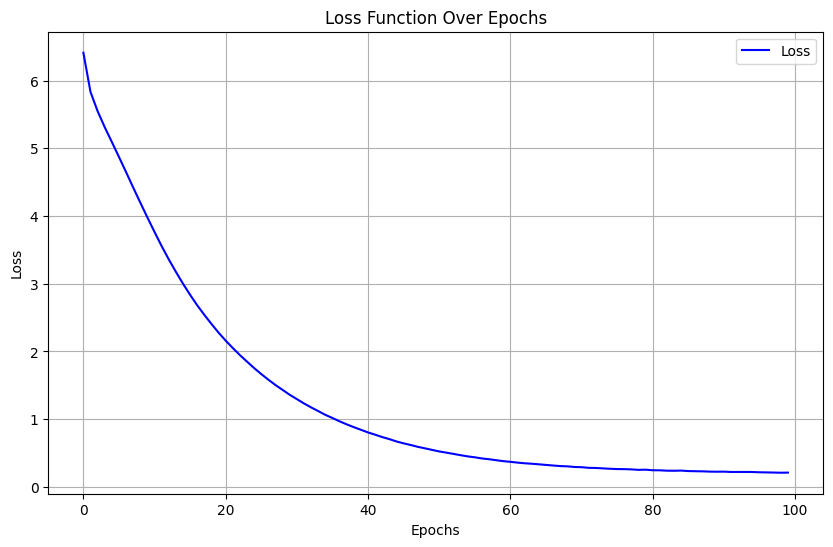

In [12]:
# Your plot code here
# Your plot code here

import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Loss', color='blue')
plt.title('Loss Function Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

In [99]:
# An example of generated text. There is no function `generate_text` in the code above.
# print(generate_text(length=500, temperature=0.2))
import numpy as np
import random
def generate_poem(model, num_poems=1, words_per_poem=125, temperature=0.8):#как заметка т=0.8 - лучшее
    start_word = random.choice(list(token_to_idx.keys()))
    input_eval = [token_to_idx[start_word]]  # Начинаем со слова
    input_eval = tf.expand_dims(input_eval, 0)  # Shape (1, num_input)
    poem = []
    for _ in range(num_poems):

        line_generated = []

        for _ in range(words_per_poem):
            predictions = model(input_eval)  # Shape (1, vocab_size)
            predictions = tf.squeeze(predictions, 0)  # Shape (vocab_size,)

            # Apply temperature to the predictions
            predictions = predictions / temperature  # Scale predictions by temperature

            # Sample from the distribution
            predicted_id = tf.random.categorical(tf.expand_dims(predictions, 0), num_samples=1)[0, 0].numpy()

            # Update input_eval
            input_eval = tf.expand_dims(np.append(input_eval.numpy()[0], predicted_id), 0)

            # Append predicted word to the line
            line_generated.append(idx_to_token[predicted_id])

        # Join generated words into a line and append to the poem
        poem.append(' '.join(line_generated))


    poem_text_1 = ' '.join(poem) + " newline"
    poem_text_1 = poem_text_1.replace(' newline', '\n')
    poem_text_1 = poem_text_1.replace('newline ', '\n')
    poem_text = re.sub(r'\n+', '\n', poem_text_1)

    return '' + start_word + ' ' + poem_text


generated_poem = generate_poem(model, num_poems=1, words_per_poem=125, temperature=0.8)
print("poem:\n",generated_poem)


poem:
 therefore guides feasts so despair thy mortal beauty must a plea knife fickle tomb
 then in them far natures composed old had stoln fair
 hath beautys love and thy love self as oft all too
 which will might had up in this cannot art
 that thou mayst beauty fair a tomb key better red
 but the truth and eyes that taught thee this than no painting form bending more perfect conceit on a dream
 have change in me
 till that which not you are copy what they had fair so you were to self some water it my will
 and all loves eyes cannot poor with natures treasure days in these dear good
 or better might shall



### More poetic model

Let's use LSTM instead of vanilla RNN and compare the results.

In [41]:
# Build model using LSTM
def build_model_LSTM(vocab_size, embedding_dim=64, lstm_units=128):
    model_LSTM = tf.keras.Sequential([
        tf.keras.layers.Input(shape=(None,)),  # Input layer
        tf.keras.layers.Embedding(vocab_size, embedding_dim),
        tf.keras.layers.LSTM(lstm_units, return_sequences=False, recurrent_initializer='glorot_uniform'),
        tf.keras.layers.Dense(vocab_size)
    ])
    return model_LSTM

# Example usage
vocab_size = len(token_to_idx)
model_LSTM = build_model(vocab_size)


In [52]:
# Train model
model_LSTM.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])
history_LSTM = model_LSTM.fit(inputs, targets, epochs=100, batch_size=64)


Epoch 1/100
310/310 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.1133 - loss: 6.2608
Epoch 2/100
310/310 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.2208 - loss: 4.5197
Epoch 3/100
310/310 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.3032 - loss: 3.4883
Epoch 4/100
310/310 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.4468 - loss: 2.5727
Epoch 5/100
310/310 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.5600 - loss: 1.9917
Epoch 6/100
310/310 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.6428 - loss: 1.6192
Epoch 7/100
310/310 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.6999 - loss: 1.3472
Epoch 8/100
310/310 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7368 - loss: 1.1986
Epoch 9/100
310/310 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7697 - loss: 1.0452
Epoch 10/100
310/310 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.7980 - loss: 0.9251
Epoch 11/100
310/310 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.8193 - loss: 0.8416
Epoch 12/100
310/310 ━━━━━━━━━━━━━━━━━━━━

Plot the loss function of the number of epochs. Does the final loss become better?

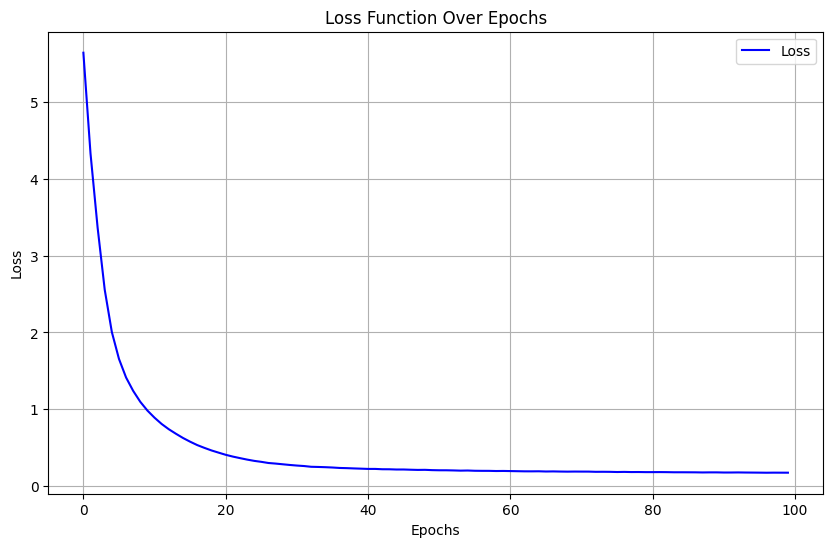

In [53]:
# Your beautiful code here
plt.figure(figsize=(10, 6))
plt.plot(history_LSTM.history['loss'], label='Loss', color='blue')
plt.title('Loss Function Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

Generate text using the trained net with different `temperature` parameter: `(0.1, 0.2, 0.5, 1.0, 2.0)`.

Evaluate the results visually, try to interpret them.

Обоснование выбора words_per_line=125: 115 - среднее количество токен/стих.
Визуально проанализировав, оптимальная температура для RNN temperature=0.8, для LSTM temperature=1.2.
Таким образом, сохраняется структура стиха(строчки, которые должны рифмоваться имеют примерно одинаковую длину).
Иногда появляются рифмы, 1-2 рифмы на весь стих.
Пример:
RNN, words_per_poem=125, temperature=0.8

`even me as nothing might`

`weeds the other as`

`yet him to read proves bonds that me in thee`

`but which in sight`


might - sight

чаще всего при температуре 0.8 - 1.2 количество строк в стихе 10-12, как и в датасете

In [96]:
# Text generation with different temperature values here
def generate_poem_LSTM(model_LSTM, num_poems=1, words_per_poem=125, temperature=1.0):
    # Randomly choose a starting word from the vocabulary
    start_word = random.choice(list(token_to_idx.keys()))
    input_eval = [token_to_idx[start_word]]  # Start with the chosen word
    input_eval = tf.expand_dims(input_eval, 0)  # Shape (1, num_input)

    poem = []

    for _ in range(num_poems):
        line_generated = []

        for _ in range(words_per_poem):
            predictions = model_LSTM(input_eval)  # Shape (1, vocab_size)
            predictions = tf.squeeze(predictions, 0)  # Shape (vocab_size,)

            # Apply temperature to the predictions
            predictions = predictions / temperature  # Scale predictions by temperature



            # Sample from the distribution
            predicted_id = tf.random.categorical(tf.expand_dims(predictions, 0), num_samples=1)[0, 0].numpy()

            # Update input_eval
            input_eval = tf.expand_dims(np.append(input_eval.numpy()[0], predicted_id), 0)

            # Append predicted word to the line
            line_generated.append(idx_to_token[predicted_id])


        # Join generated words into a line and append to the poem
    poem.append(' '.join(line_generated))
    poem_text_1_LSTM = ' '.join(poem) + " newline"
    poem_text_1_LSTM = poem_text_1_LSTM.replace(' newline', '\n')
    poem_text_1_LSTM = poem_text_1_LSTM.replace('newline ', '\n')
    poem_text_LSTM = re.sub(r'\n+', '\n', poem_text_1_LSTM)



    return '' + start_word + ' ' + poem_text_LSTM

# Example of generating a poem
generated_poem_t1 = generate_poem_LSTM(model_LSTM, num_poems=1, words_per_poem=80, temperature=0.1)
print('t=0.1\n', generated_poem_t1)


t=0.1
 offices so as as store at disgrace to come away me me lovst lovst lovst pen pen pen pen she off would use dead
 she in me lovely of thus had
 was was mark summers summers frown stronger am at base first effect more love when that when water when first kept pain
 to you should make make any any live live from that place life that that infection life life by by down others others others grow



In [60]:
generated_poem_t2 = generate_poem(model_LSTM, num_poems=1, words_per_poem=80, temperature=0.2)
print('t=0.2\n', generated_poem_t2)

t=0.2  time come
 when have see their doom lives hence hence with hours with decay
 for both pride
 than you down kind adverse second memory memory beams breast delight
 o never saw mine own live friend love on whom my love thee
 or or by this silence by thought call away thus own own birds lovst seem
 sake
 but doth their sake



In [78]:
generated_poem_t3 = generate_poem(model_LSTM, num_poems=1, words_per_poem=80, temperature=0.5)
print('t=0.5\n', generated_poem_t3)

t=0.5
  which thought so far time
 since wits joy eclipses joy eclipses removd your hours that every place
 but worth
 worth live thought gone
 that own image image from own sake sake when see thy am old am old
 thy am but like
 against
 to thee to the the world the thought of power on ere shouldst read read read read eternity eternity eternity upon upon eternity knowing defence
 thus
 things past



In [81]:
generated_poem_t6 = generate_poem(model_LSTM, num_poems=1, words_per_poem=125, temperature=0.8)
print('t=0.8\n', generated_poem_t6)

t=0.8
  in he had old thy face hath three hot would glory
 why seasons kind great the buried unused beauty of both wrinkles we shadow with his youthful thorns things height
 things past
 those worth from worth you than you than you than thou lovst
 sin of their autumn where tis absent tis thought myself the joy beams unused stay
 but once distilld preposterously flame to be
 those appetite call not from new
 to call
 but live seem truly image seem but truly truly image call seem draw strange image thief image may call call
 die suffering of that am



In [82]:
generated_poem_t4 = generate_poem(model_LSTM, num_poems=1, words_per_poem=80, temperature=1)
print('t=1.0\n', generated_poem_t4)

t=1.0
  times heart will worms
 thus did this and did have
 shall fairer so
 but mine own true loves in all loves call away
 alterd than others grow
 or thus but enough that same thief
 how far advantage look by ill at of of of their their more than mine mine own hand seem
 of thee a single worth
 than be fair art
 or from this this set



In [74]:
generated_poem_t7 = generate_poem(model_LSTM, num_poems=1, words_per_poem=80, temperature=1.2)
print('t=1.2\n', generated_poem_t7)

t=1.2
  by others wretched we we public guess shouldst saw of state
 though whose while weeds drowns unmoved unmoved bosoms sound
 chide
 composed bitterness say whence live drawn advantage manys
 where worth come till distilld
 to come
 image wear till none taste rememberd she after new new after infection new task look tongues said joy after anew anew anew injurious anew anew weeds weeds weeds joy weeds weeds fairer graciously weeds
 losing public elsewhere



In [24]:
generated_poem_t5 = generate_poem(model_LSTM, num_poems=1, words_per_poem=80, temperature=1.5)
print('t=1.5\n', generated_poem_t5)

t=1.5  spirits wink sweets red impannelled belong
 pitywanting hand but at sighs ashes pipe it fill
 that thou mayst knowing
 impression old shall am now
 why in my seeing me not that which bring elements your beauty alone and yet be good power there was seem invention age
 the sad angel on natures stores most love and now win age clouds which old took heat this keeps the stars
 nor longer nor more much form will
 unless you like a lamb sought cannot miles think
 you live unwood and wires front strangely forth
 and thou thou use mine own true life to ride
 or vanishing or rider unlookd shows be and yet love and truth free



In [22]:
generated_poem_t5 = generate_poem(model_LSTM, num_poems=1, words_per_poem=80, temperature=2)
print('t=2.0\n', generated_poem_t5)

t=2.0  again wasteful verse confound
 what god jewel count deepest prove
 receiving thither miser it who calls of love nature am so changes showst ere friend holds oer lays keen increase
 if the dull of state reproving greet new thou wilt not when first wretchs have sharpst can tell
 fortune limits sad pipe again halt again threescore miles beauteous shall say myself and live that ere leap itself may said and beauty fair myself disgrace
 oft love that some summers require
 cruel hear thou a seek and have my servants built grind
 mixd for they takes conspire of swallowd drops on all to store
 are thee
 which womans face would show where seeing
 o for the



### Saving and loading models

Save the model to the disk, then load it and generate text.
Follow guides from [this tutorial](https://pytorch.org/tutorials/beginner/saving_loading_models.html).

You need to use `Save/Load state_dict (Recommended)` section aka save state dict.

In [55]:
# Сохранение весов модели
model.save_weights('model_weights.weights.h5')

In [56]:
# Сохранение весов модели_LSTM
model_LSTM.save_weights('model_weights_LSTM.weights.h5')

In [57]:

# Загрузка весов модели
model = build_model(vocab_size)  # Инициализация модели заново
model.load_weights('model_weights.weights.h5')
# Загрузка весов модели_LSTM
model_LSTM = build_model_LSTM(vocab_size)  # Инициализация модели заново
model_LSTM.load_weights('model_weights_LSTM.weights.h5')



In [85]:
# генерация
generated_poem = generate_poem(model, num_poems=1, words_per_poem=125, temperature=0.8)
print("poem:\n",generated_poem)

poem:
  
yet thou art then being careful unseen writ dream ear travel into truly write
 and will might live are mind
 and that which look is it words
 till return eye read bare rest where they love thee as those art still
 to this might teach princes seat hugely cold
 by oft predict bright
 till why have quiet find
 want but one doth image shade doth not less life must till with fortunes minds
 o how the careful of thee yet this is not die me who shall steal shouldst bear
 till be sure to render live the scope
 although a bliss
 pluck thee date



In [95]:
# генерация
generated_poem_t1 = generate_poem_LSTM(model_LSTM, num_poems=1, words_per_poem=125, temperature=0.8)
print('t=0.1\n', generated_poem_t1)

t=0.1
  times end
 to greet
 to teach thee
 look look all or life now
 and life
 that truly lovst thou this that place thus shouldst own
 thus shouldst taken sake stay sake am not to be receives
 for nothing but but things wrong
 on them some flower some flower thought
 advantage tis better great is perjurd roses
 upon that shadow friend both own loves own own did call
 thus since look into those life doth thought that what is their deeds neer day are happy to self yet with eyes to make place
 thou lovst lovst
 the black black black night new was new sake sake sake to



## Additional materials on topic

1. [Andrew Karpathy blog post about RNN.](http://karpathy.github.io/2015/05/21/rnn-effectiveness/)\
There are several examples of genration: Shakespeare texts, Latex formulas, Linux Sourse Code and children names.
2. <a href='https://github.com/karpathy/char-rnn'> Repo with char-rnn code </a>
3. Cool repo with [PyTorch examples](https://github.com/spro/practical-pytorch`)